# Car Price Prediction Multiple Linear Regression

**Aulia Fauzani Mukti**<br>
Email : auliafauzani@gmail.com<br>
Phone : +6287823308277<br>
Linkedin : https://linkedin.com/in/auliamukti
<br>

# Import Library & Read Dataset

In [1]:
#import library
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import statsmodels.stats.proportion as sp
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('CarPrice_Assignment.csv')
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


| Variable | Definition |
| ----------- | ----------- |
|	Car_ID			|Unique id of each observation (Interger)		
|	Symboling 		|	Its assigned insurance risk rating, A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.(Categorical) 		
|	carCompany		|	Name of car company (Categorical)		
|	fueltype		|	Car fuel type i.e gas or diesel (Categorical)		
|	aspiration		|	Aspiration used in a car (Categorical)		
|	doornumber		|	Number of doors in a car (Categorical)		
|	carbody			|body of car (Categorical)		
|	drivewheel		|	type of drive wheel (Categorical)		
|	enginelocation	|		Location of car engine (Categorical)		
|	wheelbase		|	Weelbase of car (Numeric)		
|	carlength		|	Length of car (Numeric)		
|	carwidth		|	Width of car (Numeric)		
|	carheight		|	height of car (Numeric)		
|	curbweight		|	The weight of a car without occupants or baggage. (Numeric)		
|	enginetype		|	Type of engine. (Categorical)		
|	cylindernumber	|		cylinder placed in the car (Categorical)		
|	enginesize		|	Size of car (Numeric)		
|	fuelsystem		|	Fuel system of car (Categorical)		
|	boreratio		|	Boreratio of car (Numeric)		
|	stroke			| Stroke or volume inside the engine (Numeric)		
|	compressionratio|compression ratio of car (Numeric)		
|	horsepower		|Horsepower (Numeric)		
|	peakrpm			|car peak rpm (Numeric)		
|	citympg			|Mileage in city (Numeric)		
|	highwaympg		|	Mileage on highway (Numeric)		
|	price(Dependent variable)|			Price of car (Numeric)		

In [4]:
#changing column name
df.rename(columns={'car_ID' : 'id', 'symboling' : 'symbol', 'CarName' : 'name', 'fueltype' : 'fuel', 'doornumber' : 'door', 
                   'carbody' : 'body', 'drivewheel' : 'wheel', 'enginelocation' : 'engineloc', 'carlength' : 'length', 
                   'carwidth' : 'width', 'carheight' : 'height', 'curbweight' : 'weight', 'enginetype' : 'engine', 
                   'cylindernumber' : 'cylinder', 'horsepower' : 'hp'}, inplace = True)

In [5]:
df

,id,symbol,name,fuel,aspiration,door,body,wheel,engineloc,wheelbase,length,width,height,weight,engine,cylinder,enginesize,fuelsystem,boreratio,stroke,compressionratio,hp,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


# EDA

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                205 non-null    int64  
 1   symbol            205 non-null    int64  
 2   name              205 non-null    object 
 3   fuel              205 non-null    object 
 4   aspiration        205 non-null    object 
 5   door              205 non-null    object 
 6   body              205 non-null    object 
 7   wheel             205 non-null    object 
 8   engineloc         205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  length            205 non-null    float64
 11  width             205 non-null    float64
 12  height            205 non-null    float64
 13  weight            205 non-null    int64  
 14  engine            205 non-null    object 
 15  cylinder          205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [7]:
df.sample(7)

,id,symbol,name,fuel,aspiration,door,body,wheel,engineloc,wheelbase,length,width,height,weight,engine,cylinder,enginesize,fuelsystem,boreratio,stroke,compressionratio,hp,peakrpm,citympg,highwaympg,price
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.40,7.00,160,5500,16,22,17859.167
132,133,3,saab 99e,gas,std,two,hatchback,fwd,front,99.1,186.6,66.5,56.1,2658,ohc,four,121,mpfi,3.54,3.07,9.31,110,5250,21,28,11850.000
78,79,2,mitsubishi outlander,gas,std,two,hatchback,fwd,front,93.7,157.3,64.4,50.8,2004,ohc,four,92,2bbl,2.97,3.23,9.40,68,5500,31,38,6669.000
37,38,0,honda accord,gas,std,two,hatchback,fwd,front,96.5,167.5,65.2,53.3,2236,ohc,four,110,1bbl,3.15,3.58,9.00,86,5800,27,33,7895.000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500.000
106,107,1,nissan clipper,gas,std,two,hatchback,rwd,front,99.2,178.5,67.9,49.7,3139,ohcv,six,181,mpfi,3.43,3.27,9.00,160,5200,19,25,18399.000
162,163,0,toyota mark ii,gas,std,four,sedan,fwd,front,95.7,166.3,64.4,52.8,2140,ohc,four,98,2bbl,3.19,3.03,9.00,70,4800,28,34,9258.000


from sampling, data looks ok

In [8]:
#separate categorical and numerical
cats = ['id', 'symbol', 'name', 'fuel', 'aspiration', 'door', 'body', 'wheel', 'engineloc', 'engine', 'cylinder', 'fuelsystem']
nums = ['wheelbase', 'length', 'width', 'height', 'weight', 'enginesize','boreratio','stroke','compressionratio','hp','peakrpm','citympg','highwaympg','price']

In [9]:
#change the data type to make it easier to describe data
df = df.astype({'id' : object, 'symbol' : object})

In [10]:
df[cats].describe()

,id,symbol,name,fuel,aspiration,door,body,wheel,engineloc,engine,cylinder,fuelsystem
count,205,205,205,205,205,205,205,205,205,205,205,205
unique,205,6,147,2,2,2,5,3,2,7,7,8
top,1,0,toyota corolla,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,1,67,6,185,168,115,96,120,202,148,159,94


In [11]:
df[nums].describe()

,wheelbase,length,width,height,weight,enginesize,boreratio,stroke,compressionratio,hp,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [12]:
#change type data back
df = df.astype({'id' : 'int64', 'symbol' : 'int64'})

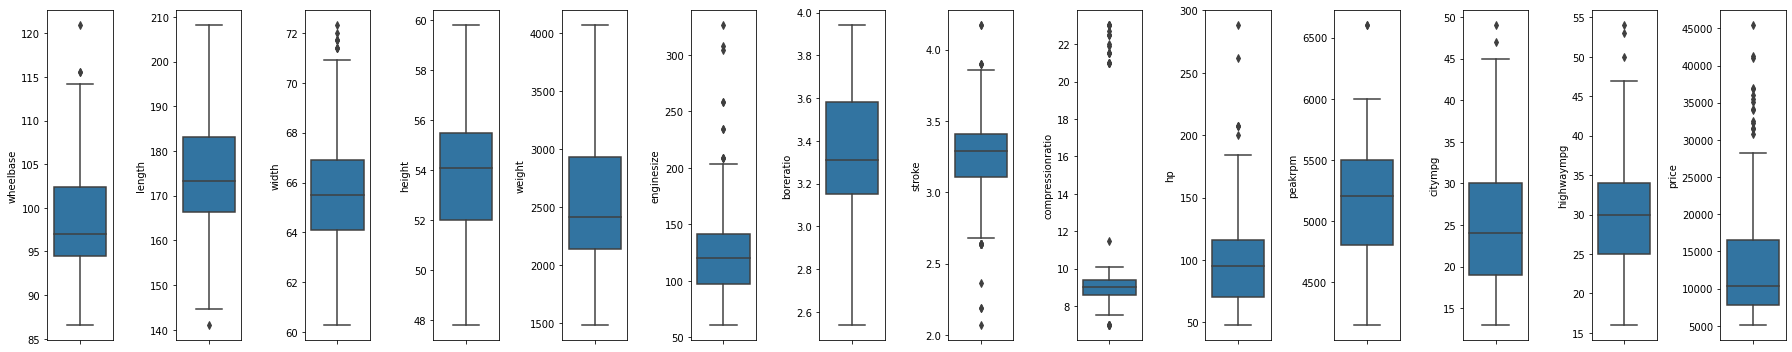

In [13]:
plt.figure(figsize=(25, 5))
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.boxplot(y=df[nums[i]], orient='v')
    plt.tight_layout()

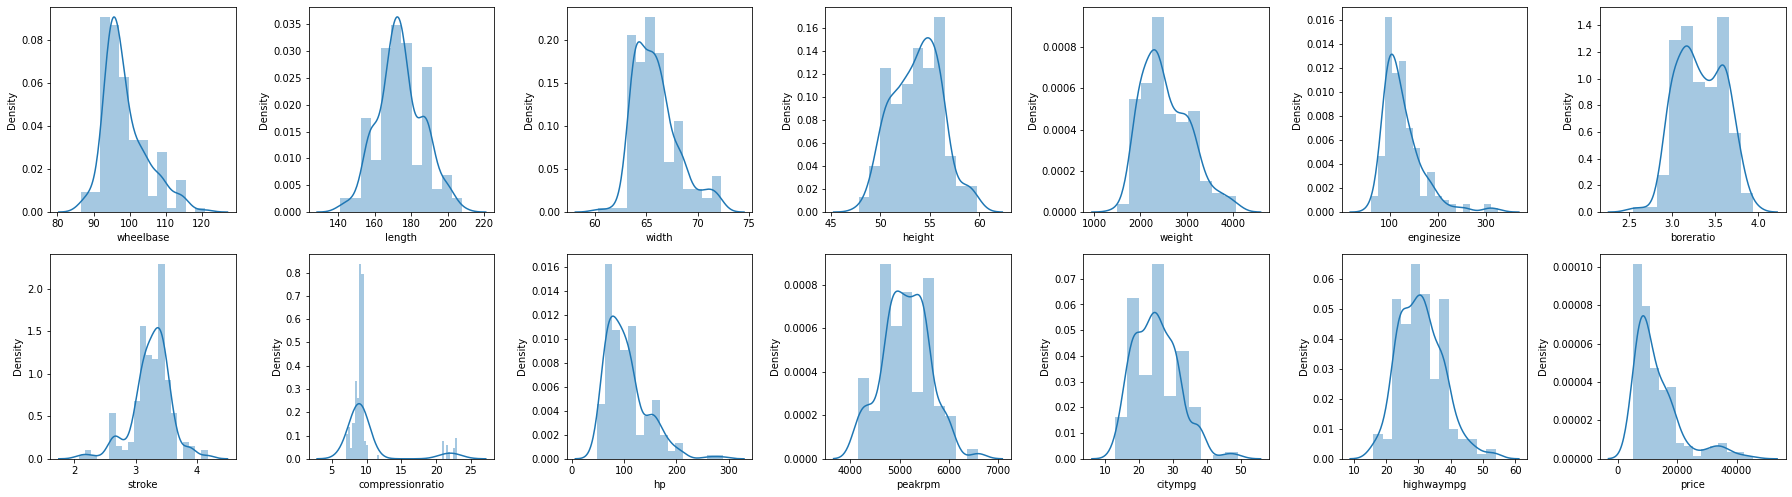

In [14]:
plt.figure(figsize=(25, 10))
for i in range(0, len(nums)):
    plt.subplot(3, len(nums)/2, i+1)
    sns.distplot(df[nums[i]])
    plt.tight_layout()

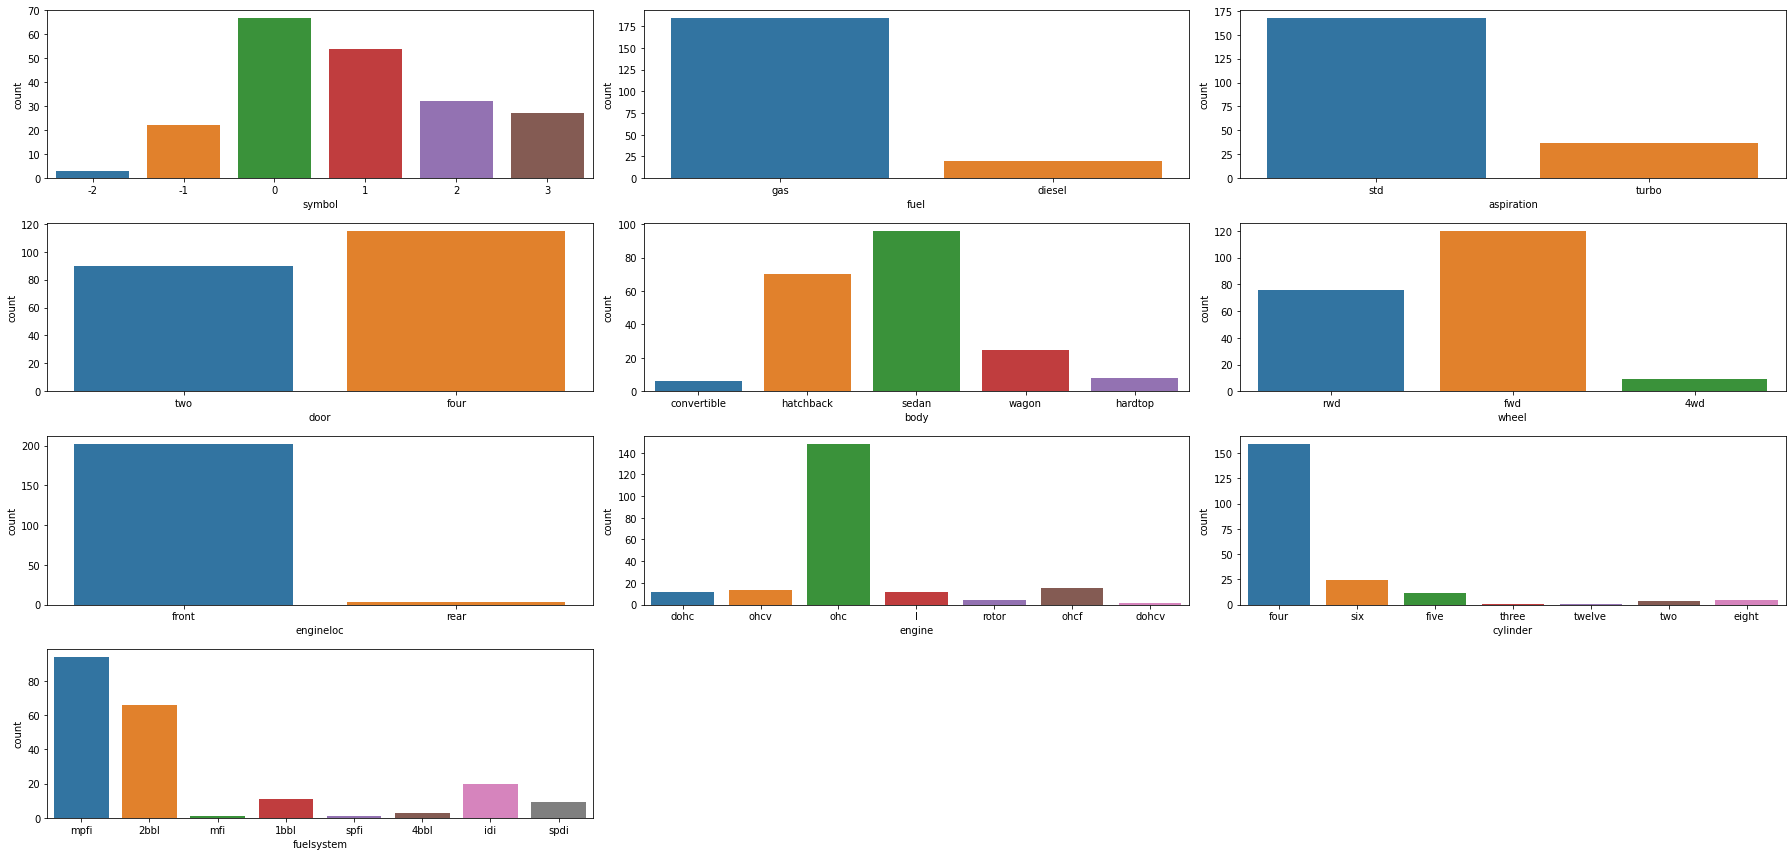

In [15]:
catsplot = ['symbol','fuel', 'aspiration', 'door', 'body', 'wheel', 'engineloc', 'engine', 'cylinder', 'fuelsystem']
plt.figure(figsize=(25, 12))
for i in range(0, len(catsplot)):
    plt.subplot(4, 3, i+1)
    sns.countplot(df[catsplot[i]], orient='v')
    plt.tight_layout()

quick analysis based on data:<br>
-most of symbol (car safety) are high risk because the car list mostly japan made, the chassis light, its most likely to break if compared to US or EU made cars<br>
-most of the car using gas/petrol engine<br>
-most of the car are std or using normally aspirated engine (NA)<br>
-between 2 and 4 door are almost equal, mostly 4 door<br>
-most of the car are sedan/saloon, followed by hatchback and wagon<br>
-most of the car are fwd, indicate that mostly is city car/daily use car<br>
-most city car are front-engined, because most of the car is daily use car<br>
-most of the car engine type is ohc(mostly japanese car manufacturer use this type of engine for the car)<br>
-most of the car have four cylinder, mostly japanese daily car have four instead of three<br>
-most of the engine fuel system is mpfi or using fuel injection instead of carburetor (bbl)<br>

<AxesSubplot:>

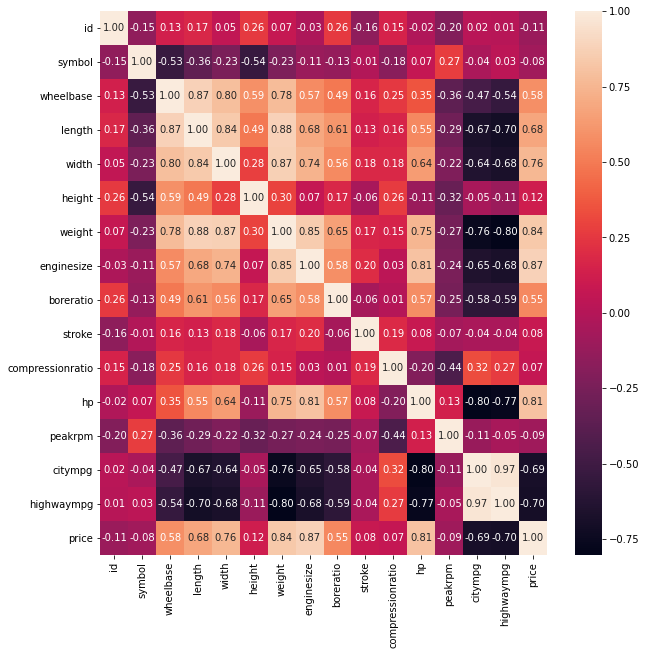

In [16]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, fmt='.2f')

<Figure size 720x720 with 0 Axes>

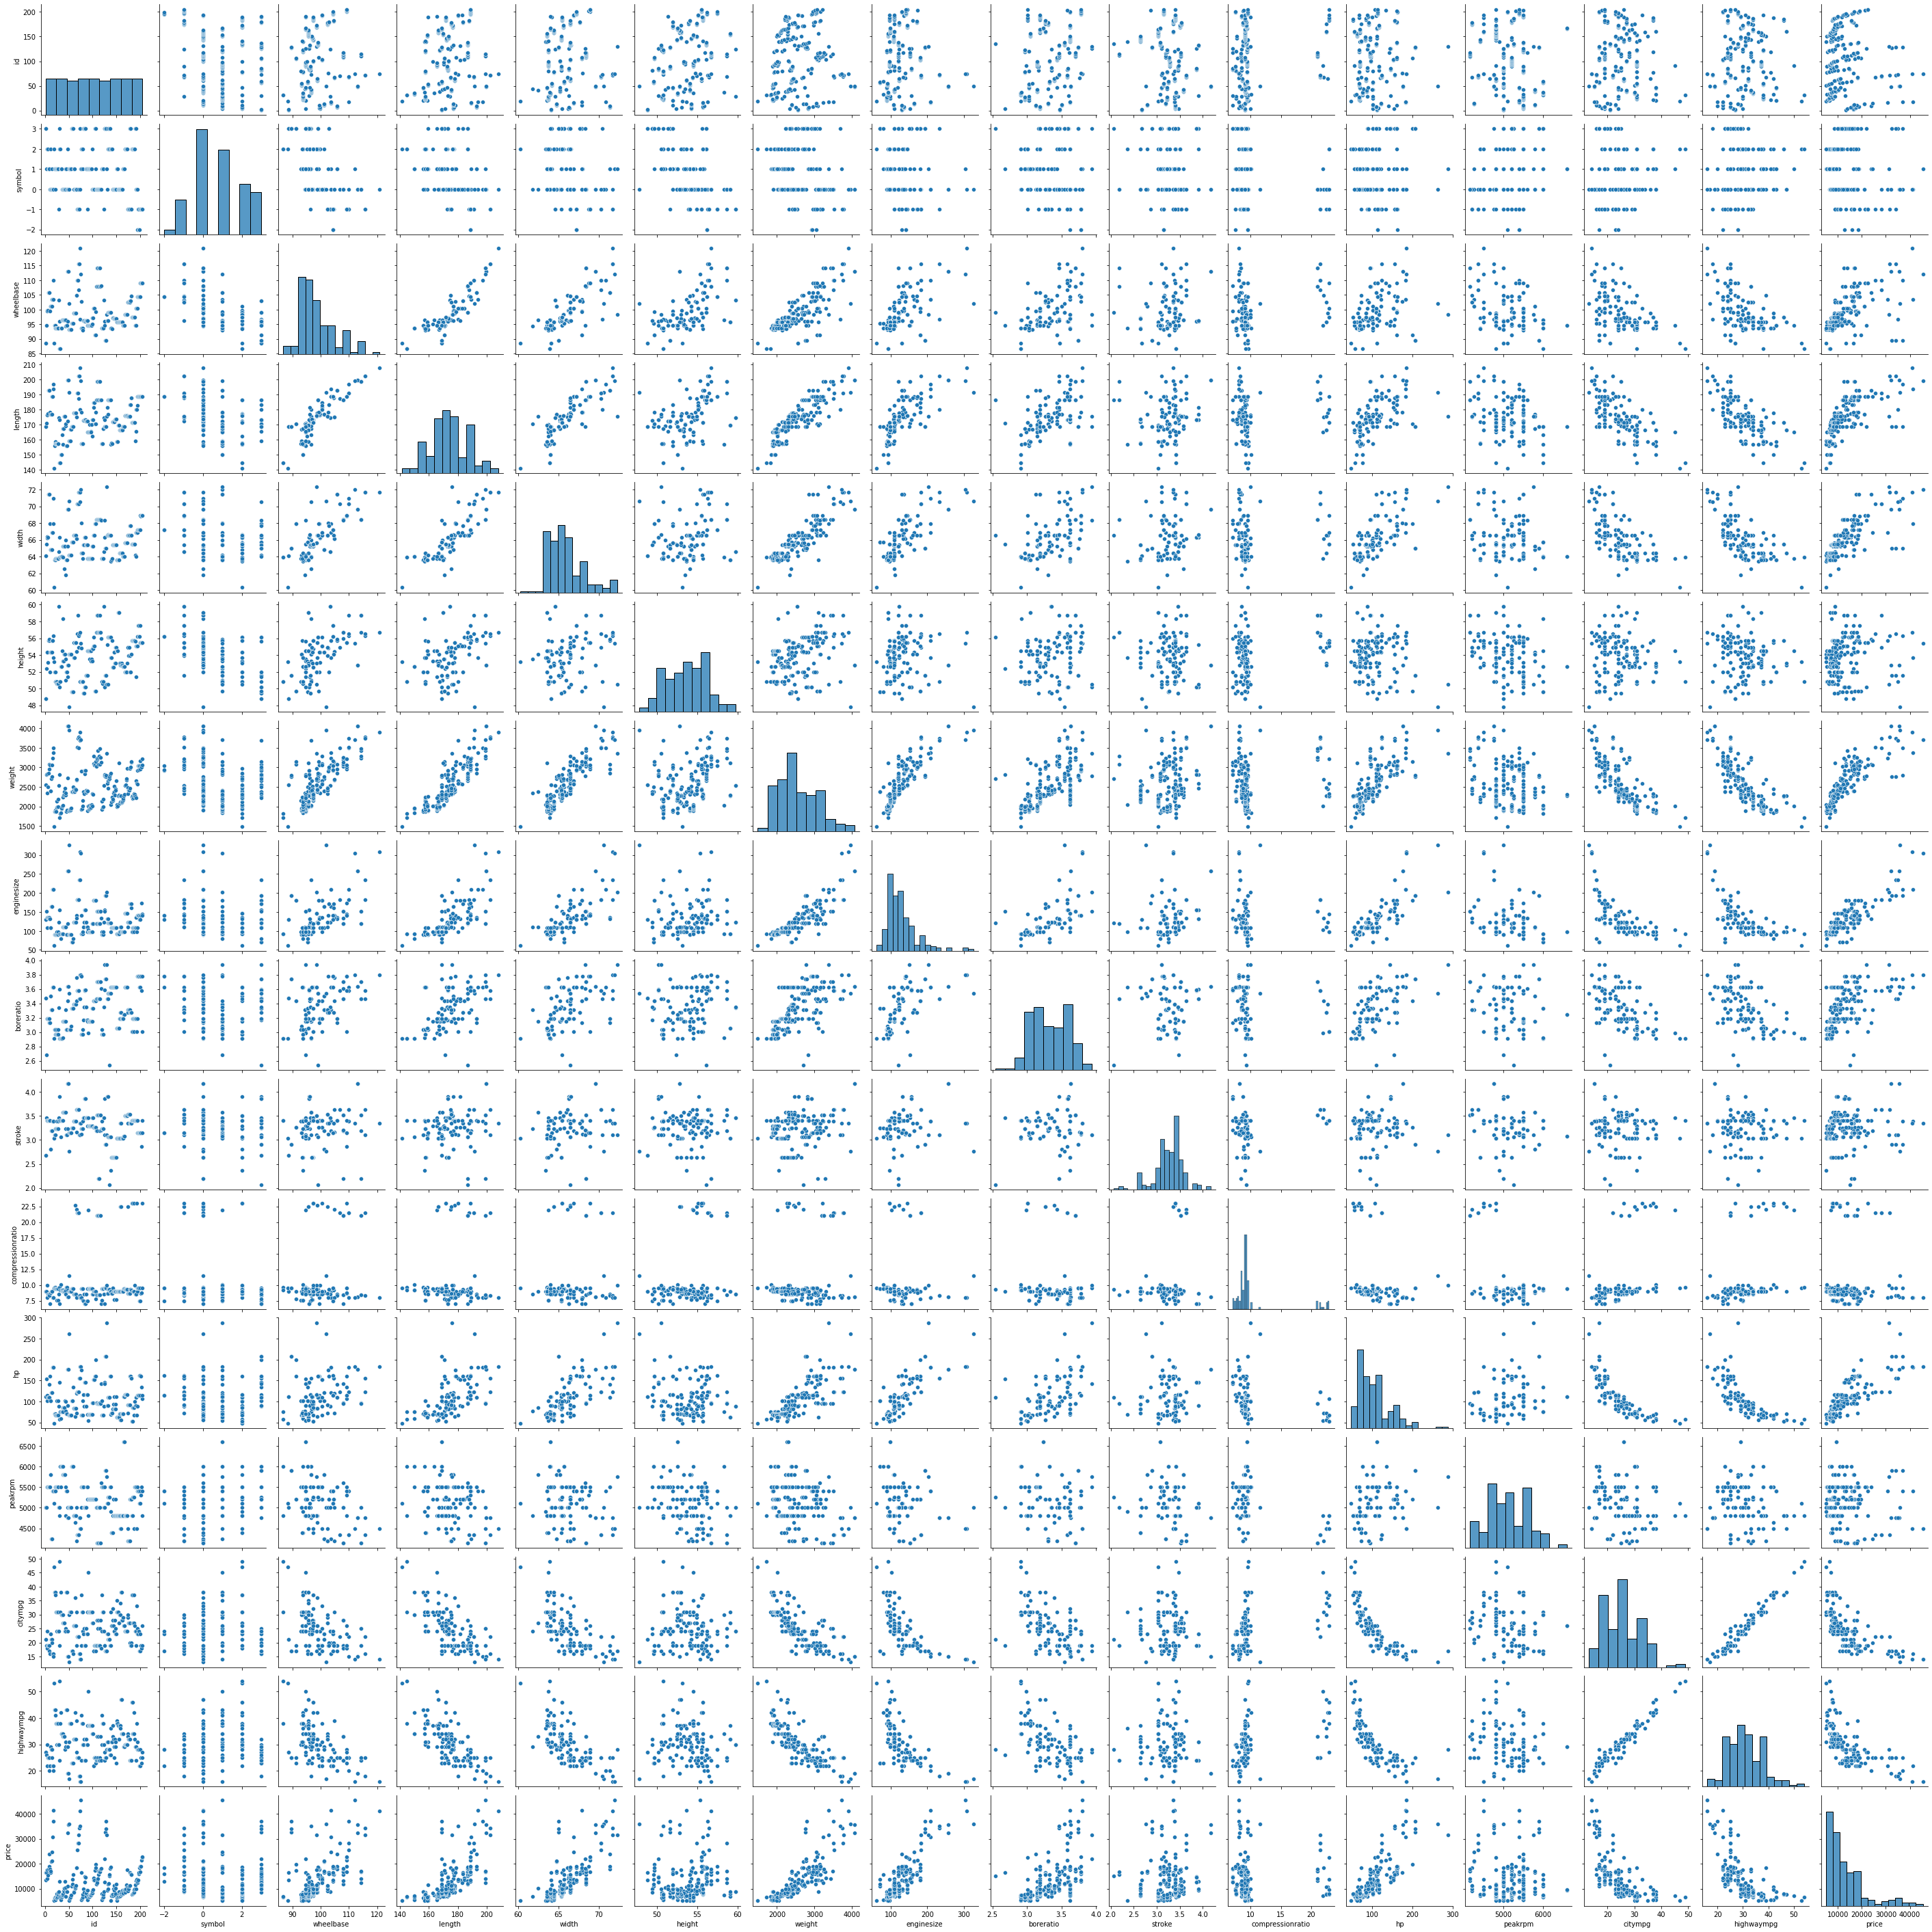

In [17]:
plt.figure(figsize=(10, 10))
sns.pairplot(df)

# Dataframe

There are 2 versions of DataFrame <br>
1. df = Original DF, no treatment
2. df_ori = Original DF with Feature Encoding & Feature Normalization (for modelling)

## df

In [18]:
df.head()

,id,symbol,name,fuel,aspiration,door,body,wheel,engineloc,wheelbase,length,width,height,weight,engine,cylinder,enginesize,fuelsystem,boreratio,stroke,compressionratio,hp,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                205 non-null    int64  
 1   symbol            205 non-null    int64  
 2   name              205 non-null    object 
 3   fuel              205 non-null    object 
 4   aspiration        205 non-null    object 
 5   door              205 non-null    object 
 6   body              205 non-null    object 
 7   wheel             205 non-null    object 
 8   engineloc         205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  length            205 non-null    float64
 11  width             205 non-null    float64
 12  height            205 non-null    float64
 13  weight            205 non-null    int64  
 14  engine            205 non-null    object 
 15  cylinder          205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

### Check missing Value

In [20]:
df.isna().sum()

id                  0
symbol              0
name                0
fuel                0
aspiration          0
door                0
body                0
wheel               0
engineloc           0
wheelbase           0
length              0
width               0
height              0
weight              0
engine              0
cylinder            0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
hp                  0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

### Check duplicate Value

In [21]:
df.duplicated().sum()

0

In [22]:
df['cylinder'].head(20)

0      four
1      four
2       six
3      four
4      five
5      five
6      five
7      five
8      five
9      five
10     four
11     four
12      six
13      six
14      six
15      six
16      six
17      six
18    three
19     four
Name: cylinder, dtype: object

## df_ori

In [23]:
df_ori=df.copy()

### Feature Encoding df_ori

In [24]:
df_ori.head()

,id,symbol,name,fuel,aspiration,door,body,wheel,engineloc,wheelbase,length,width,height,weight,engine,cylinder,enginesize,fuelsystem,boreratio,stroke,compressionratio,hp,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [25]:
df_ori.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                205 non-null    int64  
 1   symbol            205 non-null    int64  
 2   name              205 non-null    object 
 3   fuel              205 non-null    object 
 4   aspiration        205 non-null    object 
 5   door              205 non-null    object 
 6   body              205 non-null    object 
 7   wheel             205 non-null    object 
 8   engineloc         205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  length            205 non-null    float64
 11  width             205 non-null    float64
 12  height            205 non-null    float64
 13  weight            205 non-null    int64  
 14  engine            205 non-null    object 
 15  cylinder          205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [26]:
#One Hot Encoding
FEfuel_ori = pd.get_dummies(df_ori['fuel'], prefix = 'fuel')
FEaspiration_ori = pd.get_dummies(df_ori['aspiration'], prefix = 'aspiration')
FEdoor_ori = pd.get_dummies(df_ori['door'], prefix = 'door')
FEbody_ori = pd.get_dummies(df_ori['body'], prefix = 'body')
FEwheel_ori = pd.get_dummies(df_ori['wheel'], prefix = 'wheel')
FEengineloc_ori = pd.get_dummies(df_ori['engineloc'], prefix = 'engineloc')
FEengine_ori = pd.get_dummies(df_ori['engine'], prefix = 'engine')
FEfuelsystem_ori = pd.get_dummies(df_ori['fuelsystem'], prefix = 'fuelsystem')

#Concat One Hot Encoding
df_ori = pd.concat([df_ori, FEfuel_ori], axis = 1)
df_ori = pd.concat([df_ori, FEaspiration_ori], axis = 1)
df_ori = pd.concat([df_ori, FEdoor_ori], axis = 1)
df_ori = pd.concat([df_ori, FEbody_ori], axis = 1)
df_ori = pd.concat([df_ori, FEwheel_ori], axis = 1)
df_ori = pd.concat([df_ori, FEengineloc_ori], axis = 1)
df_ori = pd.concat([df_ori, FEengine_ori], axis = 1)
df_ori = pd.concat([df_ori, FEfuelsystem_ori], axis = 1)

In [27]:
df_ori.head()

,id,symbol,name,fuel,aspiration,door,body,wheel,engineloc,wheelbase,length,width,height,weight,engine,cylinder,enginesize,fuelsystem,boreratio,stroke,compressionratio,hp,peakrpm,citympg,highwaympg,price,fuel_diesel,fuel_gas,aspiration_std,aspiration_turbo,door_four,door_two,body_convertible,body_hardtop,body_hatchback,body_sedan,body_wagon,wheel_4wd,wheel_fwd,wheel_rwd,engineloc_front,engineloc_rear,engine_dohc,engine_dohcv,engine_l,engine_ohc,engine_ohcf,engine_ohcv,engine_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,0,1,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,0,1,1,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0


In [28]:
#Drop Categorical Feature
df_ori = df_ori.drop(columns = ['id', 'name', 'fuel', 'aspiration', 'door', 'body', 'wheel', 'engineloc', 'engine', 'fuelsystem'])

In [29]:
df_ori.head(10)

,symbol,wheelbase,length,width,height,weight,cylinder,enginesize,boreratio,stroke,compressionratio,hp,peakrpm,citympg,highwaympg,price,fuel_diesel,fuel_gas,aspiration_std,aspiration_turbo,door_four,door_two,body_convertible,body_hardtop,body_hatchback,body_sedan,body_wagon,wheel_4wd,wheel_fwd,wheel_rwd,engineloc_front,engineloc_rear,engine_dohc,engine_dohcv,engine_l,engine_ohc,engine_ohcf,engine_ohcv,engine_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,88.6,168.8,64.1,48.8,2548,four,130,3.47,2.68,9.0,111,5000,21,27,13495.000,0,1,1,0,0,1,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,3,88.6,168.8,64.1,48.8,2548,four,130,3.47,2.68,9.0,111,5000,21,27,16500.000,0,1,1,0,0,1,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,1,94.5,171.2,65.5,52.4,2823,six,152,2.68,3.47,9.0,154,5000,19,26,16500.000,0,1,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
3,2,99.8,176.6,66.2,54.3,2337,four,109,3.19,3.40,10.0,102,5500,24,30,13950.000,0,1,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,2,99.4,176.6,66.4,54.3,2824,five,136,3.19,3.40,8.0,115,5500,18,22,17450.000,0,1,1,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
5,2,99.8,177.3,66.3,53.1,2507,five,136,3.19,3.40,8.5,110,5500,19,25,15250.000,0,1,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
6,1,105.8,192.7,71.4,55.7,2844,five,136,3.19,3.40,8.5,110,5500,19,25,17710.000,0,1,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
7,1,105.8,192.7,71.4,55.7,2954,five,136,3.19,3.40,8.5,110,5500,19,25,18920.000,0,1,1,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
8,1,105.8,192.7,71.4,55.9,3086,five,131,3.13,3.40,8.3,140,5500,17,20,23875.000,0,1,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
9,0,99.5,178.2,67.9,52.0,3053,five,131,3.13,3.40,7.0,160,5500,16,22,17859.167,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0


In [30]:
df_ori['cylinder'].replace({'two': 2, 'three': 3, 'four': 4, 'five': 5, 'six': 6, 'eight': 8, 'twelve': 12}, inplace=True)

In [31]:
df_ori.head(5)

,symbol,wheelbase,length,width,height,weight,cylinder,enginesize,boreratio,stroke,compressionratio,hp,peakrpm,citympg,highwaympg,price,fuel_diesel,fuel_gas,aspiration_std,aspiration_turbo,door_four,door_two,body_convertible,body_hardtop,body_hatchback,body_sedan,body_wagon,wheel_4wd,wheel_fwd,wheel_rwd,engineloc_front,engineloc_rear,engine_dohc,engine_dohcv,engine_l,engine_ohc,engine_ohcf,engine_ohcv,engine_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,13495.0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,3,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,16500.0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,1,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,9.0,154,5000,19,26,16500.0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
3,2,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,10.0,102,5500,24,30,13950.0,0,1,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,2,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,8.0,115,5500,18,22,17450.0,0,1,1,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0


In [32]:
df_ori = df_ori.astype({'cylinder' : 'int64'})

In [33]:
df_ori.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 47 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symbol            205 non-null    int64  
 1   wheelbase         205 non-null    float64
 2   length            205 non-null    float64
 3   width             205 non-null    float64
 4   height            205 non-null    float64
 5   weight            205 non-null    int64  
 6   cylinder          205 non-null    int64  
 7   enginesize        205 non-null    int64  
 8   boreratio         205 non-null    float64
 9   stroke            205 non-null    float64
 10  compressionratio  205 non-null    float64
 11  hp                205 non-null    int64  
 12  peakrpm           205 non-null    int64  
 13  citympg           205 non-null    int64  
 14  highwaympg        205 non-null    int64  
 15  price             205 non-null    float64
 16  fuel_diesel       205 non-null    uint8  
 1

### Feature Normalization df_ori

In [34]:
ori_type = ['int64', 'float64', 'uint8']
num_df_ori = df_ori.select_dtypes(include = ori_type)
nums_ori = num_df_ori.columns
print(nums_ori)

Index(['symbol', 'wheelbase', 'length', 'width', 'height', 'weight',
       'cylinder', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'hp', 'peakrpm', 'citympg', 'highwaympg', 'price', 'fuel_diesel',
       'fuel_gas', 'aspiration_std', 'aspiration_turbo', 'door_four',
       'door_two', 'body_convertible', 'body_hardtop', 'body_hatchback',
       'body_sedan', 'body_wagon', 'wheel_4wd', 'wheel_fwd', 'wheel_rwd',
       'engineloc_front', 'engineloc_rear', 'engine_dohc', 'engine_dohcv',
       'engine_l', 'engine_ohc', 'engine_ohcf', 'engine_ohcv', 'engine_rotor',
       'fuelsystem_1bbl', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi'],
      dtype='object')


In [35]:
for i in range(len(nums_ori)):
    df_ori[nums_ori[i]] = MinMaxScaler().fit_transform(df_ori[nums_ori[i]].values.reshape(len(df_ori), 1))

In [36]:
df_ori.head()

,symbol,wheelbase,length,width,height,weight,cylinder,enginesize,boreratio,stroke,compressionratio,hp,peakrpm,citympg,highwaympg,price,fuel_diesel,fuel_gas,aspiration_std,aspiration_turbo,door_four,door_two,body_convertible,body_hardtop,body_hatchback,body_sedan,body_wagon,wheel_4wd,wheel_fwd,wheel_rwd,engineloc_front,engineloc_rear,engine_dohc,engine_dohcv,engine_l,engine_ohc,engine_ohcf,engine_ohcv,engine_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1.0,0.058309,0.413433,0.316667,0.083333,0.411171,0.2,0.260377,0.664286,0.290476,0.1250,0.262500,0.346939,0.222222,0.289474,0.207959,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.058309,0.413433,0.316667,0.083333,0.411171,0.2,0.260377,0.664286,0.290476,0.1250,0.262500,0.346939,0.222222,0.289474,0.282558,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.6,0.230321,0.449254,0.433333,0.383333,0.517843,0.4,0.343396,0.100000,0.666667,0.1250,0.441667,0.346939,0.166667,0.263158,0.282558,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.8,0.384840,0.529851,0.491667,0.541667,0.329325,0.2,0.181132,0.464286,0.633333,0.1875,0.225000,0.551020,0.305556,0.368421,0.219254,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.8,0.373178,0.529851,0.508333,0.541667,0.518231,0.3,0.283019,0.464286,0.633333,0.0625,0.279167,0.551020,0.138889,0.157895,0.306142,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [37]:
df_ori.describe()

,symbol,wheelbase,length,width,height,weight,cylinder,enginesize,boreratio,stroke,compressionratio,hp,peakrpm,citympg,highwaympg,price,fuel_diesel,fuel_gas,aspiration_std,aspiration_turbo,door_four,door_two,body_convertible,body_hardtop,body_hatchback,body_sedan,body_wagon,wheel_4wd,wheel_fwd,wheel_rwd,engineloc_front,engineloc_rear,engine_dohc,engine_dohcv,engine_l,engine_ohc,engine_ohcf,engine_ohcv,engine_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.566829,0.354419,0.491780,0.467317,0.493740,0.414106,0.238049,0.248707,0.564111,0.564483,0.196409,0.233821,0.398009,0.339431,0.388190,0.202540,0.097561,0.902439,0.819512,0.180488,0.560976,0.439024,0.029268,0.039024,0.341463,0.468293,0.121951,0.043902,0.585366,0.370732,0.985366,0.014634,0.058537,0.004878,0.058537,0.721951,0.073171,0.063415,0.019512,0.053659,0.321951,0.014634,0.097561,0.004878,0.458537,0.043902,0.004878
std,0.249061,0.175562,0.184139,0.178767,0.203627,0.201971,0.108085,0.157142,0.193460,0.149332,0.248253,0.164767,0.194688,0.181726,0.181222,0.198323,0.297446,0.297446,0.385535,0.385535,0.497483,0.497483,0.168970,0.194127,0.475361,0.500215,0.328031,0.205380,0.493865,0.484183,0.120377,0.120377,0.235330,0.069843,0.235330,0.449134,0.261054,0.244304,0.138655,0.225894,0.468368,0.120377,0.297446,0.069843,0.499498,0.205380,0.069843
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,0.230321,0.376119,0.316667,0.350000,0.254849,0.200000,0.135849,0.435714,0.495238,0.100000,0.091667,0.265306,0.166667,0.236842,0.066283,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.600000,0.303207,0.479104,0.433333,0.525000,0.359193,0.200000,0.222642,0.550000,0.580952,0.125000,0.195833,0.428571,0.305556,0.368421,0.128519,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.800000,0.460641,0.626866,0.550000,0.641667,0.561288,0.200000,0.301887,0.742857,0.638095,0.150000,0.283333,0.551020,0.472222,0.473684,0.282632,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000

# Modelling

## Split Train & Test

In [38]:
x = df_ori.drop(columns=['price']) # all feature except target
y = df_ori['price']

In [39]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=1/3, random_state=42) #Splitting the data into Train and Test

## Fit Model Simple Linear Regression
Fitting Model to Train Set


In [40]:
#Fitting simple linear regression to the Training Set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(xtrain, ytrain)

LinearRegression()

## Predict
Predict the Test Set

In [41]:
pred = regressor.predict(xtest) #Predicting the prices

In [42]:
pred

array([ 5.30729318e-01,  3.51008649e-01,  1.32454056e-01,  1.78184061e-01,
        5.21424232e-01,  3.36703606e-03,  2.95394084e-02,  6.47370162e-02,
        5.56175466e-02,  6.86162470e-02,  2.84428685e-01,  6.82541413e-02,
        2.93133771e-01,  1.04732132e-01,  9.19177877e-01,  4.30130880e-02,
       -3.13945032e-01,  2.04898270e-01,  1.34536788e-01,  1.10737457e-01,
        1.66172149e-01,  3.15158381e-01,  9.05928317e-02, -5.43426315e-02,
        3.81358979e-02,  5.32923626e-01,  2.37026251e-01,  2.57656775e-01,
       -2.73570013e-02,  2.95419560e-01,  5.54511864e-01,  1.59677079e-02,
        3.31399791e-02,  4.56560500e-01,  4.11061784e-02,  5.79015051e-01,
        2.06730208e-01,  2.11234071e-01,  3.18613006e-02,  2.12613106e-01,
        2.98417037e-02,  2.14148471e-01,  2.93693812e-01,  2.72609753e-02,
        3.99623340e-02,  9.36547615e-02,  1.59677079e-02,  2.21249387e-02,
        2.81535714e-01,  2.65984581e-01,  2.85064072e-03,  3.72952469e-01,
        4.62287403e-02,  

## Evaluation

In [43]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
def eval_regression(model, pred, xtrain, ytrain, xtest, ytest):
    print("MAE: %.2f" % mean_absolute_error(ytest, pred)) # The MAE
    print("RMSE: %.2f" % mean_squared_error(ytest, pred, squared=False)) # The RMSE
    print('R2 score: %.2f' % r2_score(ytest, pred)) # Explained variance score: 1 is perfect prediction
    print("train Accuracy : ",regressor.score(xtrain,ytrain))
    print("test Accuracy : ",regressor.score(xtest,ytest))

In [44]:
pred = regressor.predict(xtest)

print('Coefficients: \n', regressor.coef_) # The slope
print('Intercept: \n', regressor.intercept_) # The Intercept

eval_regression(regressor, pred, xtrain, ytrain, xtest,ytest)

Coefficients: 
 [ 4.90744965e-02  1.71025458e-01 -4.91529746e-02  2.09063290e-01
  5.80327165e-02  2.31280809e-01  1.65418700e-01  6.99780081e-01
 -8.79897231e-02 -1.88276555e-01 -5.02375568e-01 -1.48210738e-01
  1.26110206e-01  6.03209764e-02 -2.76590777e-02  1.30753650e-01
 -1.30753650e-01 -2.82130958e-02  2.82130958e-02  7.74554836e-03
 -7.74554836e-03  7.14652029e-02  4.36382392e-02 -3.02276188e-02
 -1.00331208e-02 -7.48427024e-02 -7.18699312e-03 -1.52318426e-02
  2.24188357e-02 -1.61641934e-01  1.61641934e-01 -3.80110889e-02
  1.53010771e-01 -1.71247124e-01 -1.98347971e-02 -5.13588055e-02
 -9.29415507e-02  2.20382595e-01  1.98600475e-04 -6.03655374e-03
 -3.95416573e-02  1.30753650e-01  0.00000000e+00 -3.94340723e-03
 -6.79032198e-02 -1.35274123e-02]
Intercept: 
 0.2551424601971348
MAE: 0.05
RMSE: 0.08
R2 score: 0.83
train Accuracy :  0.9476531307207069
test Accuracy :  0.8310869153390684


Coefficient could be interpret as feature importance in linear regression

## Checking other models

In [45]:
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [46]:
def eval_regression_2(model, pred, xtrain, ytrain, xtest, ytest):
    print("MAE: %.2f" % mean_absolute_error(ytest, pred)) # The MAE
    print("RMSE: %.2f" % mean_squared_error(ytest, pred, squared=False)) # The RMSE
    print('R2 score: %.2f' % r2_score(ytest, pred)) # Explained variance score: 1 is perfect prediction
    print('Train Accuracy :', model.score(xtrain, ytrain))
    print('Test Accuracy :', model.score(xtest, ytest))
    
models = {
    "Ridge"            : Ridge(),
    "DecisionTree"     : DecisionTreeRegressor(),
    "RandomForest"     : RandomForestRegressor(),
    "SVR"              : SVR()
}

for model_name, model in models.items():
    model.fit(xtrain, ytrain)
    pred = model.predict(xtest)
    print("Evaluate model: {}".format(model_name))
    print(eval_regression_2(model, pred, xtrain, ytrain, xtest, ytest), "\n")

Evaluate model: Ridge
MAE: 0.07
RMSE: 0.10
R2 score: 0.77
Train Accuracy : 0.9225785574131092
Test Accuracy : 0.7650901347283634
None 

Evaluate model: DecisionTree
MAE: 0.04
RMSE: 0.06
R2 score: 0.90
Train Accuracy : 0.9985126821635397
Test Accuracy : 0.9015139668108098
None 

Evaluate model: RandomForest
MAE: 0.03
RMSE: 0.05
R2 score: 0.93
Train Accuracy : 0.9861413723338273
Test Accuracy : 0.9332166614615285
None 

Evaluate model: SVR
MAE: 0.07
RMSE: 0.09
R2 score: 0.78
Train Accuracy : 0.8850407332902149
Test Accuracy : 0.7831623688242499
None 

